# Bay wheels Trip Data Exploration
## by Asha George

## Preliminary Wrangling

I plan to explore the Ford GoBike data which was marked with a date of November 2019. I consciously tried to choose a dataset without the influences of the holiday season or the pandemic, knowing that tourism around the world has had a significant hit through these times but ebikes are gaining popularity as a tool for exercising and helping with the changing climate. https://thedailychronicle.in/news/996053/e-bike-sharing-market-exclusive-revelation-and-future-trends-by-2027-bixi-capital-bikeshare-citi-bike-nyc-divvy-ford-gobike-grabtaxi-jcdecaux-jump-lyft-mobike/

In [273]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [274]:
bike_data = pd.read_csv('201911-baywheels-tripdata.csv')
bike_data.head(),bike_data.shape

/Users/ashageorge/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(   duration_sec                start_time                  end_time  \
 0           707  2019-11-30 23:54:47.2970  2019-12-01 00:06:34.3780   
 1          2649  2019-11-30 23:18:36.2890  2019-12-01 00:02:45.5790   
 2          1711  2019-11-30 23:33:02.2610  2019-12-01 00:01:34.2170   
 3           931  2019-11-30 23:45:20.2720  2019-12-01 00:00:51.9560   
 4          1449  2019-11-30 23:29:56.6710  2019-11-30 23:54:05.8620   
 
    start_station_id                              start_station_name  \
 0              30.0  San Francisco Caltrain (Townsend St at 4th St)   
 1             440.0                              Carl St at Cole St   
 2             239.0                   Bancroft Way at Telegraph Ave   
 3             323.0                              Broadway at Kearny   
 4              30.0  San Francisco Caltrain (Townsend St at 4th St)   
 
    start_station_latitude  start_station_longitude  end_station_id  \
 0               37.776598              -122.395282          

In [275]:
# Let's check out the duration of the data collected. 
print(bike_data['start_time'].min(),bike_data['start_time'].max())
# The data is for a duration of a month.

2019-11-01 00:00:30.3030 2019-11-30 23:59:38


In [276]:
print(bike_data['user_type'].unique())
print(bike_data['bike_share_for_all_trip'].unique())
print(bike_data.info())
print(bike_data['rental_access_method'].unique())
print(bike_data['duration_sec'].min(),bike_data['duration_sec'].max())

['Customer' 'Subscriber']
['No' 'Yes' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185496 entries, 0 to 185495
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             185496 non-null  int64  
 1   start_time               185496 non-null  object 
 2   end_time                 185496 non-null  object 
 3   start_station_id         184573 non-null  float64
 4   start_station_name       184574 non-null  object 
 5   start_station_latitude   185496 non-null  float64
 6   start_station_longitude  185496 non-null  float64
 7   end_station_id           184524 non-null  float64
 8   end_station_name         184524 non-null  object 
 9   end_station_latitude     185496 non-null  float64
 10  end_station_longitude    185496 non-null  float64
 11  bike_id                  185496 non-null  int64  
 12  user_type                185496 non-null  object 
 13  bike_share_for_a

In [277]:
# Convert categorical variables from string to actual categorical variables.
variables = ['user_type','bike_share_for_all_trip','rental_access_method']
var_variables = {'user_type':['Subscriber','Customer'],
                 'bike_share_for_all_trip':['Yes','No'],
                  'rental_access_method':['clipper','app']}

for member in variables:
    bike_data[member] = bike_data[member].astype(pd.api.types.CategoricalDtype(categories=var_variables[member]))
bike_data.info()
bike_data['user_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185496 entries, 0 to 185495
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             185496 non-null  int64   
 1   start_time               185496 non-null  object  
 2   end_time                 185496 non-null  object  
 3   start_station_id         184573 non-null  float64 
 4   start_station_name       184574 non-null  object  
 5   start_station_latitude   185496 non-null  float64 
 6   start_station_longitude  185496 non-null  float64 
 7   end_station_id           184524 non-null  float64 
 8   end_station_name         184524 non-null  object  
 9   end_station_latitude     185496 non-null  float64 
 10  end_station_longitude    185496 non-null  float64 
 11  bike_id                  185496 non-null  int64   
 12  user_type                185496 non-null  category
 13  bike_share_for_all_trip  184086 non-null  ca

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

In [278]:
# adapted from https://www.geeksforgeeks.org/program-distance-two-points-earth/
from math import radians, cos, sin, asin, sqrt 
def distance(row): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    #print(row)
    lon1 = radians(row['start_station_longitude']) 
    lon2 = radians(row['end_station_longitude']) 
    lat1 = radians(row['start_station_latitude']) 
    lat2 = radians(row['end_station_latitude']) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 3956
       
    # calculate the result 
    return(c * r) 

In [279]:
# Let's move on to the distance travelled.
# We can use a function to calculate the distance between coordinates.
bike_data['distance']= bike_data.apply(distance,axis=1);
bike_data.head()
#bike_data['distance']
bike_data.info()
print(sum(bike_data['distance']<= 0))
print(bike_data.shape[0]-bike_data_copy.shape[0])
# Remove those distances with distance equalling zero
#bike_data_new = bike_data[bike_data['distance'] > 0]
#bike_data_new.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185496 entries, 0 to 185495
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             185496 non-null  int64   
 1   start_time               185496 non-null  object  
 2   end_time                 185496 non-null  object  
 3   start_station_id         184573 non-null  float64 
 4   start_station_name       184574 non-null  object  
 5   start_station_latitude   185496 non-null  float64 
 6   start_station_longitude  185496 non-null  float64 
 7   end_station_id           184524 non-null  float64 
 8   end_station_name         184524 non-null  object  
 9   end_station_latitude     185496 non-null  float64 
 10  end_station_longitude    185496 non-null  float64 
 11  bike_id                  185496 non-null  int64   
 12  user_type                185496 non-null  category
 13  bike_share_for_all_trip  184086 non-null  ca

In [290]:
print(sum(bike_data['distance']<= 0))
# Remove those distances with distance equalling zero
bike_data_new = bike_data[bike_data['distance'] > 0]
bike_data_new.shape
print(sum(bike_data.duplicated()))
# Also I found that there are row where the latitudes and longitudes are zero, which is in the Atlantic Ocean
# and not in SFO
bike_data_copy = bike_data_new[(bike_data_new['start_station_latitude']!=0) & (bike_data_new['end_station_latitude'] !=0)]
bike_data.shape[0]-bike_data_copy.shape[0]



4027
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 181429 entries, 0 to 185495
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             181429 non-null  int64   
 1   start_time               181429 non-null  object  
 2   end_time                 181429 non-null  object  
 3   start_station_id         180516 non-null  float64 
 4   start_station_name       180517 non-null  object  
 5   start_station_latitude   181429 non-null  float64 
 6   start_station_longitude  181429 non-null  float64 
 7   end_station_id           180468 non-null  float64 
 8   end_station_name         180468 non-null  object  
 9   end_station_latitude     181429 non-null  float64 
 10  end_station_longitude    181429 non-null  float64 
 11  bike_id                  181429 non-null  int64   
 12  user_type                181429 non-null  category
 13  bike_share_for_all_trip  180073 non-n

### What is the structure of your dataset?

The bike data has 185496 rows and 15 columns
There are two types of users- Customer and Subscriber.
There is a column bike_share_for_all_trip which states whether the user is sharing bike share for all, which offers a discounted membership.
There is also a variable which states how the person accessed the bike, through an app or clipper.

### What is/are the main feature(s) of interest in your dataset?

I would like to know the duration of the trips, the distance between the start and end points,the behavior of the type of users. Does subsribers travel more? Does bike share for all (https://www.lyft.com/bikes/bay-wheels/bike-share-for-all) encourage more usage? How do they rent the bike?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The duration of the travel is a part of the data set. The distance between the start and end points can be calculated using the start and end station latitudes and longitudes(https://www.geeksforgeeks.org/program-distance-two-points-earth/). The start and end times are already calculated. The information about the user, whether he is a customer or subscriber, whether they are using bike share for all, or the popular method of access.

## Univariate Exploration

count    181429.000000
mean        769.328762
std        1662.914893
min          60.000000
25%         370.000000
50%         579.000000
75%         882.000000
max       85935.000000
Name: duration_sec, dtype: float64
count    181429.000000
mean          2.758912
std           0.294039
min           1.778151
25%           2.568202
50%           2.762679
75%           2.945469
max           4.934170
Name: duration_sec, dtype: float64


Text(0.5, 1.0, 'Duration histogram with a log scale on the x-axis')

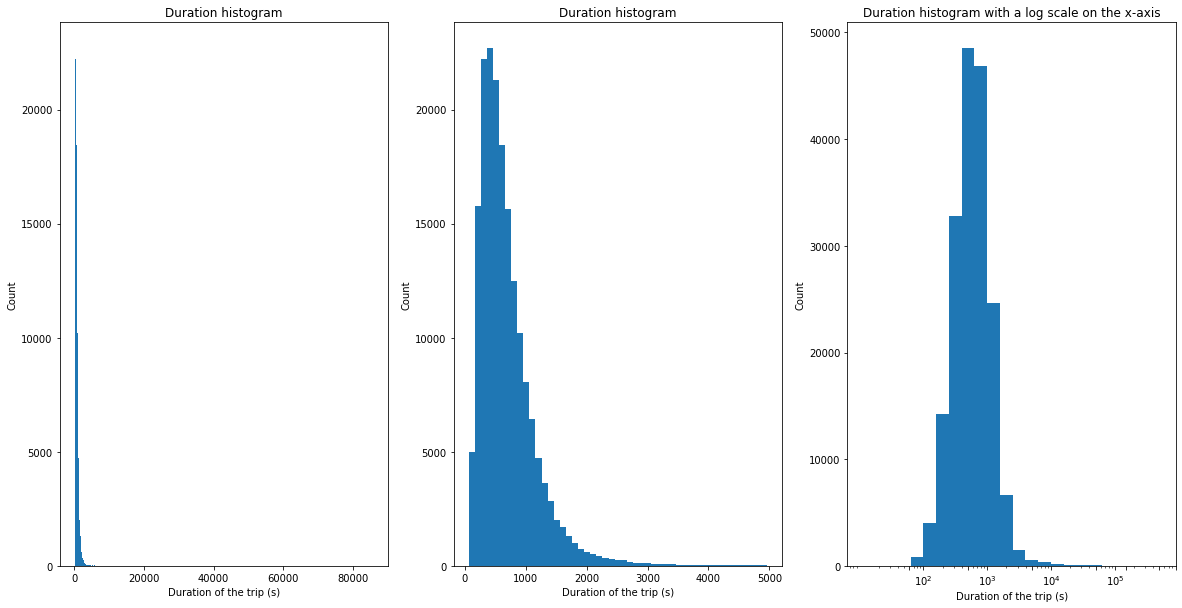

In [425]:
#Let's look at the duration of the trip. It is a quantitative variable.A good choice would be a histogram
#plt.figure(figsize=(20,10))
print(bike_data_copy['duration_sec'].describe())
plt.subplots(1,3,figsize=(20,10))
bins = np.arange(bike_data_copy['duration_sec'].min(),bike_data_copy['duration_sec'].max()+10,100)
plt.subplot(1,3,1)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins)
plt.xlabel('Duration of the trip (s)')
plt.ylabel('Count')
plt.title('Duration histogram')
plt.subplot(1,3,2)
bins=np.arange(60,5000,100)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins)
plt.xlabel('Duration of the trip (s)')
plt.ylabel('Count')
plt.title('Duration histogram')
plt.subplot(1,3,3)
# Looks like a long tail distribution.
# Trying out a log x-scale as the durations vary a great deal.
print(np.log10(bike_data_copy['duration_sec']).describe())
bins = 10**np.arange(1,5,0.2)
plt.hist(data=bike_data_copy,x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([60,100,500,1000,5000,10000,50000,100000,150000,500000,900000])
plt.xlabel('Duration of the trip (s)')
plt.ylabel('Count')
plt.title('Duration histogram with a log scale on the x-axis')

The plot is unimodal with a long tail which makes it appropriate for a log plot.
Most of the trips are around 1000 s which is between 16 and 17 mins confirming the usage for short trips.

In [ ]:
# Let's move on to the distance travelled.
# We can use a function to calculate the distance between coordinates.
bike_data_copy['distance']= bike_data_copy.apply(distance,axis=1);
bike_data_copy.head()
#bike_data['distance']
bike_data_copy.info()
print(sum(bike_data['distance']<= 0))
print(bike_data.shape[0]-bike_data_copy.shape[0])
# Remove those distances with distance equalling zero
#bike_data_new = bike_data[bike_data['distance'] > 0]
#bike_data_new.shape

9.356635330359538 count    181429.000000
mean          1.076497
std           0.645094
min           0.000233
25%           0.603196
50%           0.917296
75%           1.402898
max           9.356635
Name: distance, dtype: float64


Text(0.5, 1.0, 'Histogram of Distance')

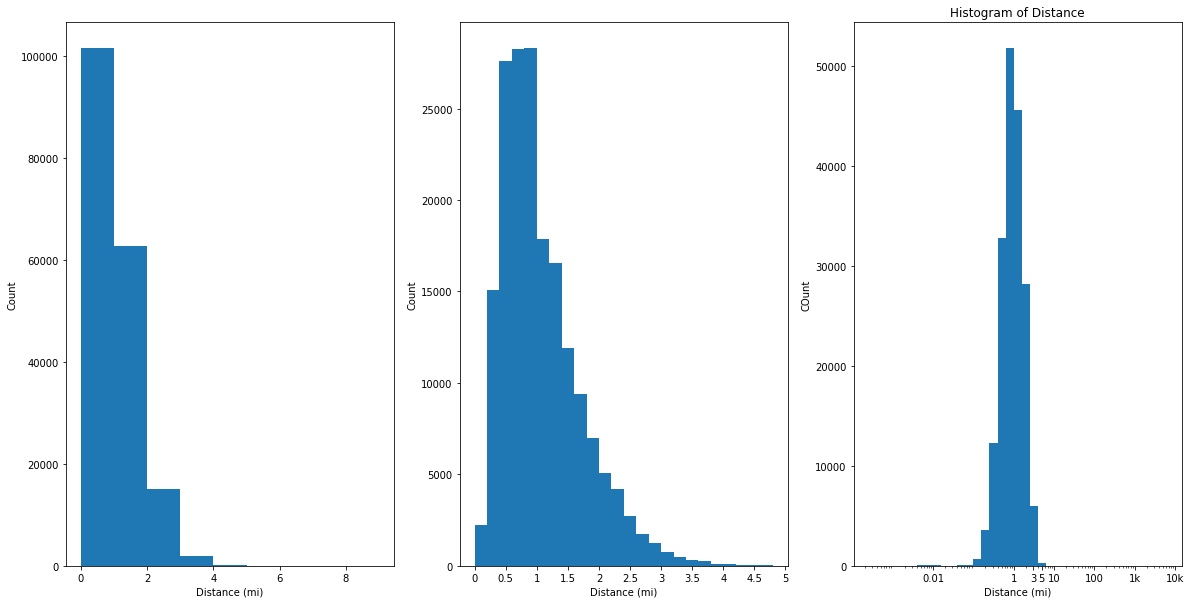

In [422]:
# Distance is a quantitative variable. So, we can use a histogram plot. 

print(bike_data_copy['distance'].max(),bike_data_copy['distance'].describe())
plt.subplots(1,3,figsize=(20,10))
bins = np.arange(0,bike_data_copy['distance'].max()+0.2,1)
plt.subplot(1,3,1)
plt.hist(data=bike_data_copy,x='distance',bins=bins)
plt.xlabel('Distance (mi)')
plt.ylabel('Count')
plt.subplot(1,3,2)
bins=np.arange(0,5,0.2)
plt.hist(data=bike_data_copy,x='distance',bins=bins)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],['0','0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']);
plt.xlabel('Distance (mi)')
plt.ylabel('Count')
plt.subplot(1,3,3)
#print(np.log10(bike_data_new['distance']).describe())
bins = 10**np.arange(-3.6,4,0.2)
#print(bins)
plt.hist(data=bike_data_copy,x='distance',bins=bins)
plt.xscale('log')
plt.xticks([0.01,1,3,5,10,100,1000,10000],[0.01,1,3,5,10,100,'1k','10k'])
plt.xlabel('Distance (mi)')
plt.ylabel('COunt')
plt.title('Histogram of Distance')
#plt.xticks([0,1,3,5,10],['0','1','3','5','10'])

The distribution has a long tail. So a log plot is appropriate. The log plot is unimodal with most of the diatance around the 1 mile mark.

Text(0.5, 1.0, 'Popular Start Station')

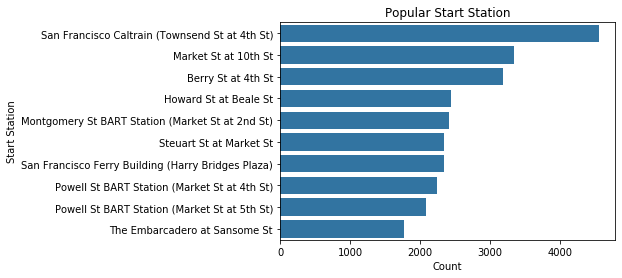

In [283]:
# Let's see how the start station is distributed. Since it is qualitative, I will use the barplot.
#sb.countplot(data=bike_data_new,x='start_station_name')
len(bike_data_copy['start_station_name'].unique())
counts = bike_data_copy.groupby('start_station_name')['duration_sec'].count().sort_values(ascending=False)
base_color = sb.color_palette()[0]
sb.barplot(counts.values[0:10],counts.index[0:10],color=base_color)
plt.xlabel('Count')
plt.ylabel('Start Station')
plt.title('Popular Start Station')

As expected,the popular ones are the stations near public transit stations (Caltrain and BART in SFO)

Text(0.5, 1.0, 'Popular End Station')

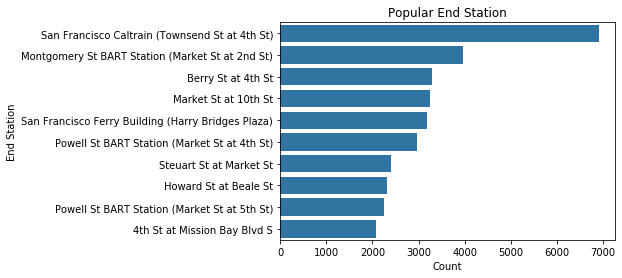

In [284]:
# I would expect similar results for end_station_name.
len(bike_data_copy['end_station_name'].unique())
counts = bike_data_copy.groupby('end_station_name')['duration_sec'].count().sort_values(ascending=False)
base_color = sb.color_palette()[0]
sb.barplot(counts.values[0:10],counts.index[0:10],color=base_color)
plt.xlabel('Count')
plt.ylabel('End Station')
plt.title('Popular End Station')

Most of the toppers in the start station set are here as well, though their positions have been rearranged.

Text(0.5, 1.0, 'Distribution of type of users.')

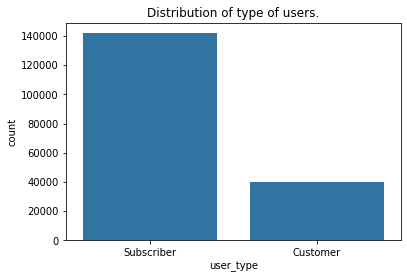

In [285]:
# Let's plot the usertype. It is a qualitative variable.Let's use the countplot
bike_data_copy['user_type'].unique()
bike_data_copy['user_type'].describe()
base_color = sb.color_palette()[0]
sb.countplot(data=bike_data_copy,x='user_type',color=base_color)
# The subscribers far outnumber the customers.
plt.title('Distribution of type of users.')

Subscribers outnumber the customers. Thoise who have an account is far more than the occasional customer.

Text(0.5, 1.0, 'Distribution of usage of bike share for all program')

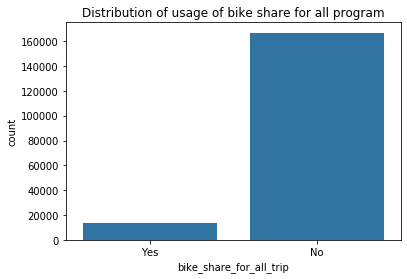

In [286]:
# Let's check the popularity of bike_share_for_all_trip
bike_data_copy['bike_share_for_all_trip'].unique()
# Considering that bike share for all program needs approval, we can assume that the nan values can be put as No.
#bike_data_new.loc[bike_data_new['bike_share_for_all_trip'].isna(),['bike_share_for_all_trip']]='No'
#bike_data_new['bike_share_for_all_trip'].unique()
base_color = sb.color_palette()[0]
sb.countplot(data=bike_data_copy,x='bike_share_for_all_trip',color=base_color)
plt.title('Distribution of usage of bike share for all program')

The number of people who uses the bike share for all is very low.

Text(0.5, 1.0, 'Usage of clipper card vs app')

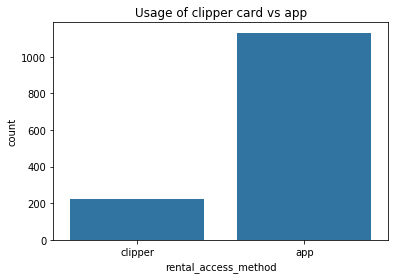

In [287]:
# Let's check the rental Access method.
bike_data_copy['rental_access_method'].unique()
base_color = sb.color_palette()[0]
sb.countplot(data=bike_data_copy,x='rental_access_method',color=base_color)
plt.title('Usage of clipper card vs app')

Looks like the clipper is not very popular. It's suprising that the popular stations are public transit stations where the clipper card is very popular. It looks like Lyft has to pouularize the usage of clipper card for its ebikes. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of distance and time of travel are similar as they would be positively correlated. They are long tail distributions with a wide range. So a log scale would be appropriate. But the most usage is for a short period and short distances.
I would like to know how subscribers, bike share for all and app or clipper card users use the bike. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I expected the usage of clipper to be more widespread considering that the most popular stations include all the train stations,BART stations and ferry terminal in the city of SFO.
I removed rows where the start and the end point are zero or where the latitude or longitude is zero.4067 rows were removed.

## Bivariate Exploration

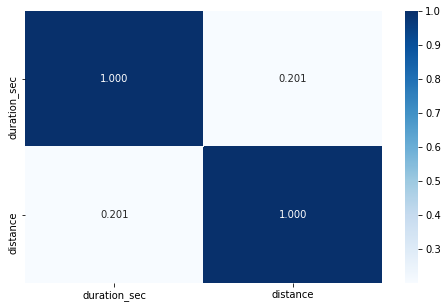

In [288]:
# Let's check out the pairwise relationships
# Splitting into quantitative and categorical variables.
num_vars = ['duration_sec','distance']
category_vars = ['start_station_name','end_station_name','user_type','bike_share_for_all_trip','rental_access_method']
plt.figure(figsize=[8,5])
sb.heatmap(bike_data_copy[num_vars].corr(),annot=True,fmt='.3f',cmap='Blues')

Text(0.5, 1.0, 'Effect of trip duration on distance covered.')

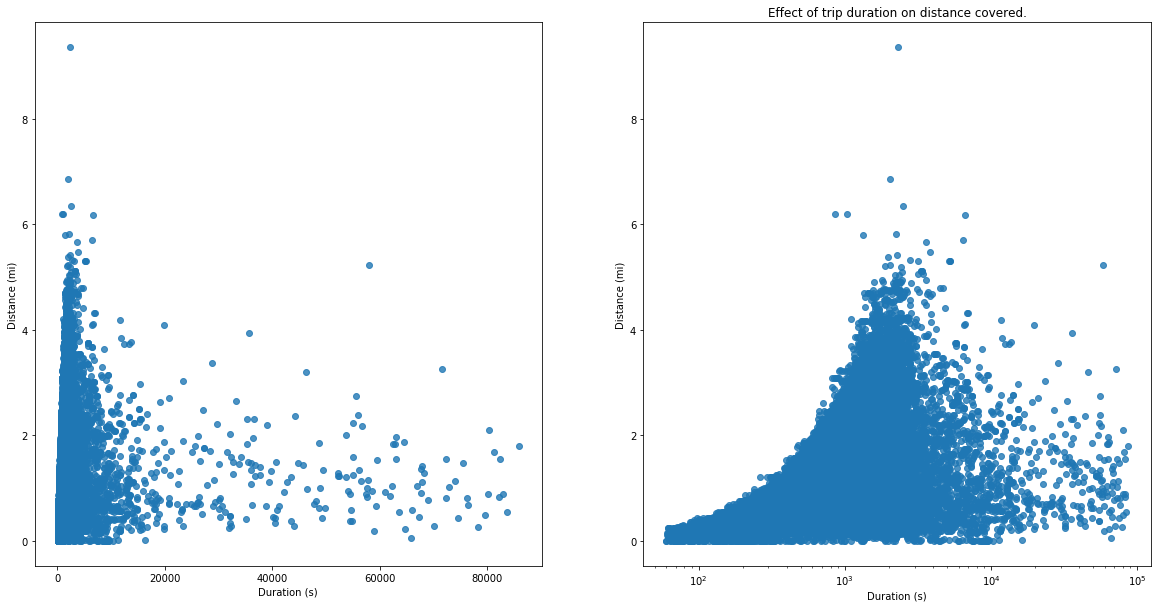

In [289]:
# Looks like there is a very slight positive correlationship between duration and distance. 
# Since both are quantitative, we can use a scatter plot using the two.
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
sb.regplot(data=bike_data_copy,x='duration_sec',y='distance',x_jitter=0.3,fit_reg=False)
plt.xlabel('Duration (s)')
plt.ylabel('Distance (mi)')
#np.log10(bike_data_copy['duration_sec']).describe()
#bins = 10**np.arange(1.5,5,0.2)
# Since it has a long tail, a log plot will be appropriate.
plt.subplot(1,2,2)
ax=sb.regplot(data=bike_data_copy,x='duration_sec',y='distance',x_jitter=0.3,fit_reg=False)
plt.xlabel('Duration (s)')
plt.ylabel('Distance (mi)')
ax.set(xscale='log')
plt.title('Effect of trip duration on distance covered.')

The plot shows that most of the distances covered are within 6 miles. The distance increases with time to a maximum and after that though the duration increases, the distance doesn't go up. Possibly, the person started at a transit station, went to the required location and came back to the transit station again. Looks like, we need to log the actual distance travelled on the bike. The business model is however based on the amount of time of rental.

user_type
Subscriber    1.046773
Customer      1.182795
Name: distance, dtype: float64
user_type
Subscriber     667.734891
Customer      1132.651264
Name: duration_sec, dtype: float64


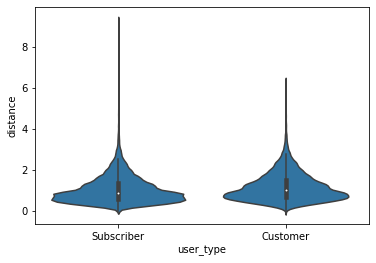

In [431]:
#Let's check out the relationship between distance and user_type. As one is quantitative and the other qualitative,
# we wil use the boxplot.
print(bike_data_copy.groupby('user_type')['distance'].mean())
print(bike_data_copy.groupby('user_type')['duration_sec'].mean())
sb.violinplot(data=bike_data_copy,x='user_type',y='distance',color=base_color)

Text(0.5, 1.0, '')

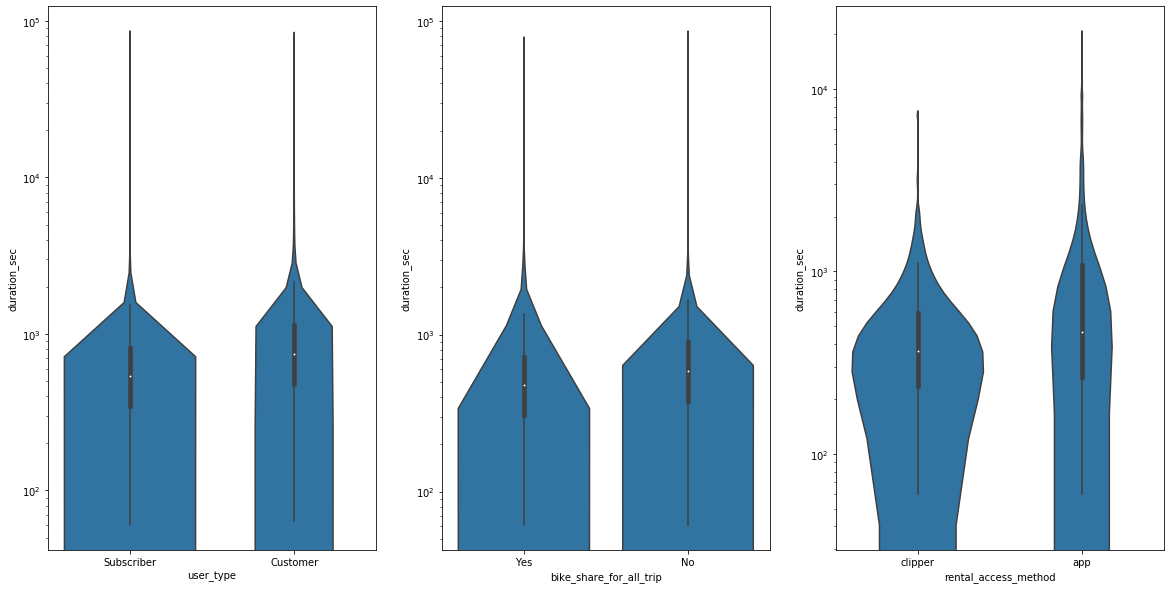

In [427]:
# Let's check out the relation between time and categorical variables. Do people who are subscribers use it more?
# We have a quantitative and a qualitative variable. Let's use a violin plot.Also a log scale is used on the y axis 
#to accomodate the range of values.
base_color = sb.color_palette()[0]
plt.subplots(1,3,figsize=(20,10))
plt.subplot(1,3,1)
sb.violinplot(data=bike_data_copy,x='user_type',y='duration_sec',color=base_color)
plt.yscale('log')
plt.subplot(1,3,2)
sb.violinplot(data=bike_data_copy,x='bike_share_for_all_trip',y='duration_sec',color=base_color)
plt.yscale('log')
plt.subplot(1,3,3)
sb.violinplot(data=bike_data_copy,x='rental_access_method',y='duration_sec',color=base_color)
plt.yscale('log')
plt.title("")

Customers spend a little more time travelling than subscribers do. Bike share for all users spend less time than people who don't use bike share for all.People who use the app tend to travel for more time. But the interquartile range for people who use clipper cards is far less than people who use apps, possibly because clipper card users use ebike primarily as a bridge between two transit stations.

['San Francisco Caltrain (Townsend St at 4th St)', 'Market St at 10th St', 'Berry St at 4th St', 'Howard St at Beale St', 'Montgomery St BART Station (Market St at 2nd St)', 'Steuart St at Market St', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'Powell St BART Station (Market St at 4th St)', 'Powell St BART Station (Market St at 5th St)', 'The Embarcadero at Sansome St']


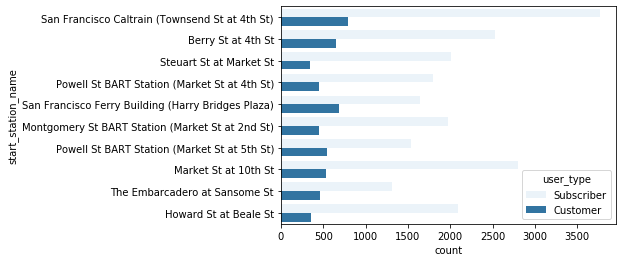

In [417]:
# Let's see the popularity of the stations based on the categorical variables. It is a plot of a categorical
# variable(station name) with another categorical variable(user_type)
grouped_data = bike_data_copy.groupby(['start_station_name'])['duration_sec'].count().sort_values(ascending=False)
xval=list(grouped_data.index[0:10])
print(xval)
base_color = sb.color_palette()[0]
data_subset = bike_data_copy[bike_data_copy['start_station_name'].isin(xval)]
sb.countplot(data=data_subset,y='start_station_name',hue='user_type',color=base_color)
#plt.xticks(rotation=90)

It looks similar to the previous plot of the stations but now with the user type. Obviously, there are more subscribers than customers.

['San Francisco Caltrain (Townsend St at 4th St)', 'Market St at 10th St', 'Berry St at 4th St', 'Howard St at Beale St', 'Montgomery St BART Station (Market St at 2nd St)', 'Steuart St at Market St', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'Powell St BART Station (Market St at 4th St)', 'Powell St BART Station (Market St at 5th St)', 'The Embarcadero at Sansome St']


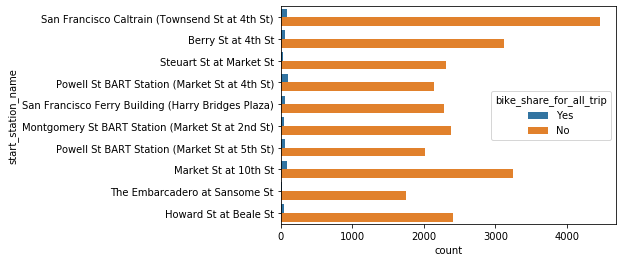

In [347]:
# Let's check out the usage of stations with the bike share for all variable.
grouped_data = bike_data_copy.groupby(['start_station_name'])['duration_sec'].count().sort_values(ascending=False)
xval=list(grouped_data.index[0:10])
print(xval)
base_color = sb.color_palette()[0]
data_subset = bike_data_copy[bike_data_copy['start_station_name'].isin(xval)]
sb.countplot(data=data_subset,y='start_station_name',hue='bike_share_for_all_trip')
#plt.xticks(rotation=90)

The plot is also expected, as the number of people who do not use bike share for all is high

['San Francisco Caltrain (Townsend St at 4th St)', 'Market St at 10th St', 'Berry St at 4th St', 'Howard St at Beale St', 'Montgomery St BART Station (Market St at 2nd St)', 'Steuart St at Market St', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'Powell St BART Station (Market St at 4th St)', 'Powell St BART Station (Market St at 5th St)', 'The Embarcadero at Sansome St']


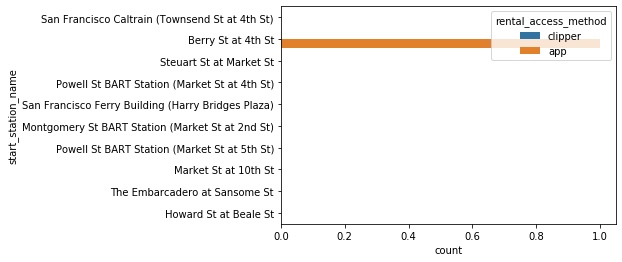

In [348]:
# A similar plot for rental access method
grouped_data = bike_data_copy.groupby(['start_station_name'])['duration_sec'].count().sort_values(ascending=False)
xval=list(grouped_data.index[0:10])
print(xval)
base_color = sb.color_palette()[0]
data_subset = bike_data_copy[bike_data_copy['start_station_name'].isin(xval)]
sb.countplot(data=data_subset,y='start_station_name',hue='rental_access_method')
#plt.xticks(rotation=90)

No clipper users. wonder where they are. Also, this variable has a high number of nans.

['Goettingen St at Bacon St', 'Jennings St at Revere Ave', 'Newhall St at 3rd St', 'Judson Ave at Gennessee St', 'Oakdale Ave at Phelps St', 'Williams Ave at Apollo St', 'Newbury Park Dr at King Rd', 'Lane St at Revere Ave', 'Mendell St at Fairfax Ave', "Heron's Head Park"]


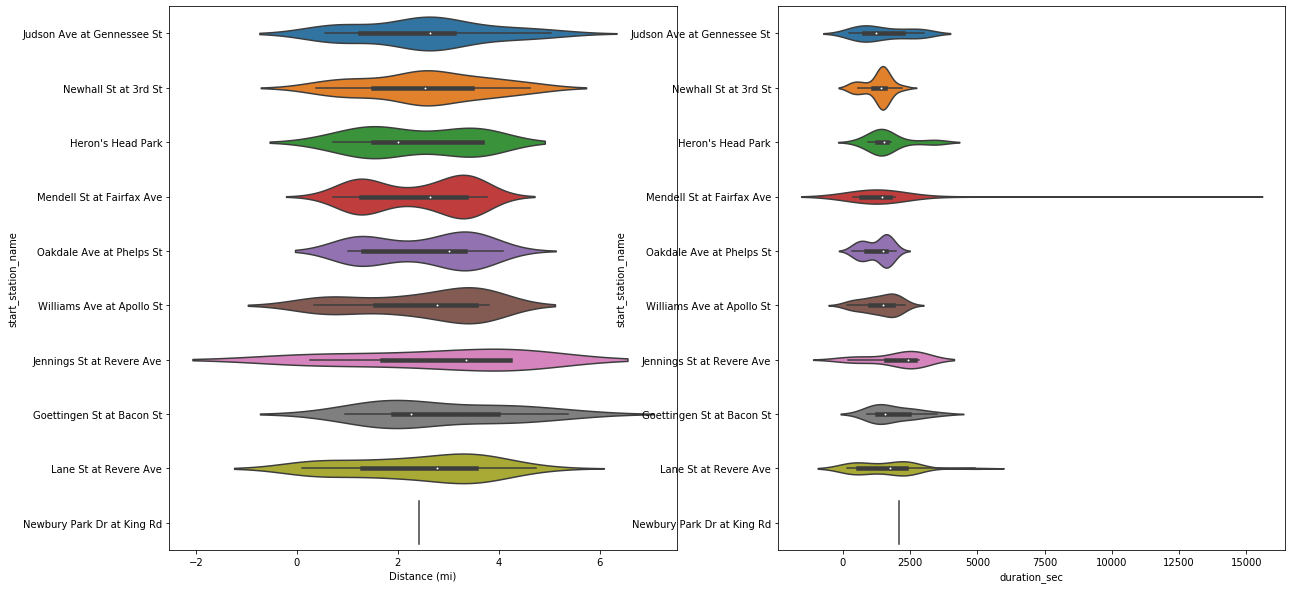

In [385]:
# Let's check out the relationship between average distance travelled  and time taken based on the start_station. There is a qualitative
# variable and a quantitative variable. Let's do the violin plot
grouped_data = bike_data_copy.groupby(['start_station_name'])['distance'].mean().sort_values(ascending=False)
xval=list(grouped_data.index[0:10])
print(xval)
base_color = sb.color_palette()[0]
data_subset = bike_data_copy[bike_data_copy['start_station_name'].isin(xval)]
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
sb.violinplot(data=data_subset,y='start_station_name',x='distance')
plt.xlabel('Distance (mi)')
plt.subplot(1,2,2)
sb.violinplot(data=data_subset,y='start_station_name',x='duration_sec')
plt.xlabel('Duration (s)')

None of the transit stations figure if the mean of distance is taken. Time to sort it the other way.

['W Julian St at N Morrison St', 'Sunol St at San Carlos St', 'Fountain Alley at S 2nd St', 'Cahill Park', 'Paseo De San Antonio at 2nd St', 'Delmas Ave and San Fernando St', 'Santa Clara St at Almaden Blvd', 'Julian St at 6th St', '9th St at San Fernando St', 'Union St at 10th St']


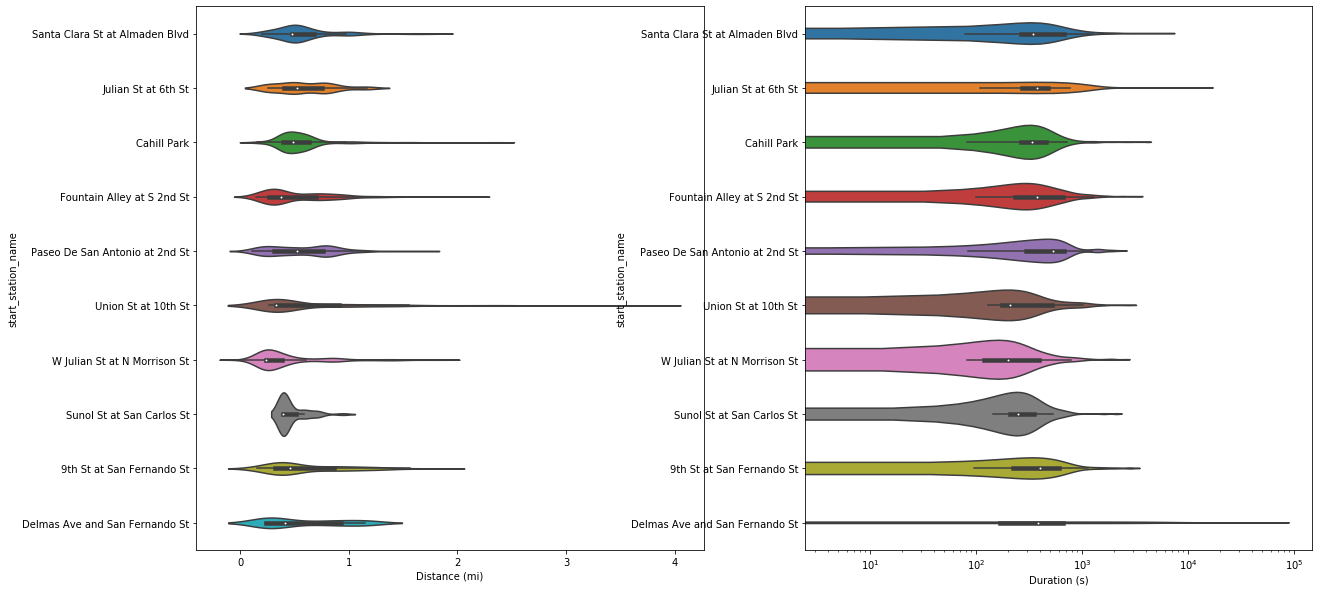

In [390]:
# The above plots with the lower mean distances
grouped_data = bike_data_copy.groupby(['start_station_name'])['distance'].mean().sort_values()
xval=list(grouped_data.index[0:10])
print(xval)
base_color = sb.color_palette()[0]
data_subset = bike_data_copy[bike_data_copy['start_station_name'].isin(xval)]
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
sb.violinplot(data=data_subset,y='start_station_name',x='distance')
plt.xlabel('Distance (mi)')
plt.subplot(1,2,2)
sb.violinplot(data=data_subset,y='start_station_name',x='duration_sec')
plt.xlabel('Duration (s)')
plt.xscale('log')

Text(0.5, 0, 'Duration (s)')

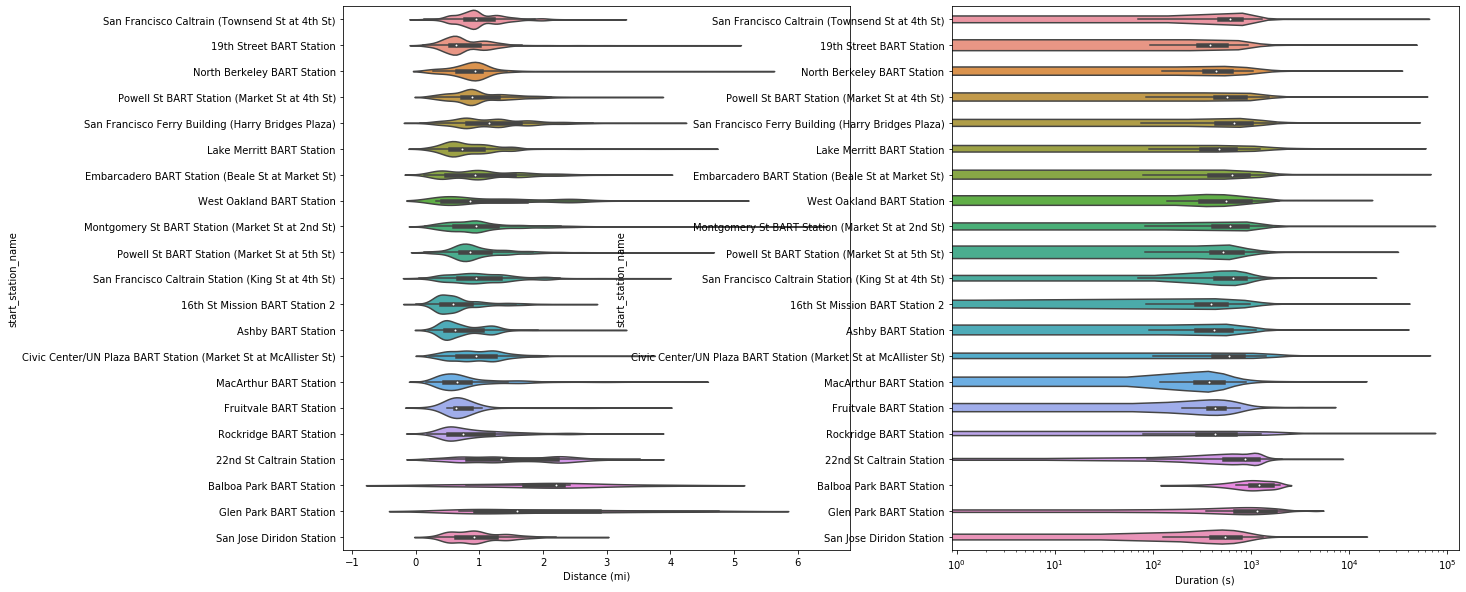

In [388]:
# Let's check out the distance travelled when the start station is a transit station
data_subset = bike_data_copy[bike_data_copy['start_station_name'].str.contains('Station') | 
                            bike_data_copy['start_station_name'].str.contains('Caltrain') |
                            bike_data_copy['start_station_name'].str.contains('Ferry')]
#grouped_data = data_subset.groupby(['start_station_name'])['distance'].mean().sort_values()
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
sb.violinplot(data=data_subset,y='start_station_name',x='distance')
plt.xlabel('Distance (mi)')
plt.subplot(1,2,2)
sb.violinplot(data=data_subset,y='start_station_name',x='duration_sec')
plt.xscale('log')
plt.xlabel('Duration (s)')

Most of the distances are in the 1 mile radius.Most of the times are around 600 seconds. Looks like users can be split into three groups based on the distances- the short(those who travel less than 1 mi), medium (travel between 1 and 2 mi) and the lst group which travel above 2 mi.

In [378]:
# Let us check the stations where the clipper is more used.
data_clipper = bike_data_copy[bike_data_copy['rental_access_method']=='clipper']
data_clipper.groupby('start_station_name')['duration_sec'].count().sort_values(ascending=False)
# Only one transit station is there(the Diridon station). Looks like clipper usage is more popular in the south bay
# or not captured for the rest.
#data_clipper['start_station_name'].isna()

start_station_name
San Fernando St at 4th St         6
Julian St at The Alameda          5
5th St at Virginia St             5
The Alameda at Bush St            3
San Jose Diridon Station          3
Ryland Park                       3
W Julian St at N Morrison St      2
Fountain Alley at S 2nd St        2
San Salvador St at 9th St         1
San Jose City Hall                1
San Fernando St at 7th St         1
San Carlos St at Meridian Ave     1
Paseo De San Antonio at 2nd St    1
4th St at San Carlos St           1
1st St at San Carlos St           1
Name: duration_sec, dtype: int64

I wonder why clipper usage is not documented in other trips.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181429 entries, 0 to 185495
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             181429 non-null  int64   
 1   start_time               181429 non-null  object  
 2   end_time                 181429 non-null  object  
 3   start_station_id         180516 non-null  float64 
 4   start_station_name       180517 non-null  object  
 5   start_station_latitude   181429 non-null  float64 
 6   start_station_longitude  181429 non-null  float64 
 7   end_station_id           180468 non-null  float64 
 8   end_station_name         180468 non-null  object  
 9   end_station_latitude     181429 non-null  float64 
 10  end_station_longitude    181429 non-null  float64 
 11  bike_id                  181429 non-null  int64   
 12  user_type                181429 non-null  category
 13  bike_share_for_all_trip  180073 non-null  ca

Text(0.5, 1.0, 'Likelihood of users using bike share for all')

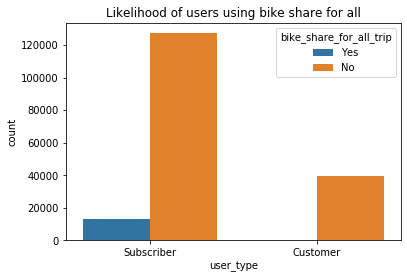

In [294]:
# Let's check out the relationship between the categorical variables- user_type and bike_share_for_all_trip.
# Do subscribers use more bike share for all?
# Since both are qualitative, we can use a clustered bar chart.
base_color = sb.color_palette()[0]
sb.countplot(data=bike_data_copy,x='user_type',hue='bike_share_for_all_trip',color=base_color)
plt.title('Likelihood of users using bike share for all')
# you are more likely to be subscribed if you use the bike share for all.

Bike share for all users are all subscribers and not one-off customers.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,distance


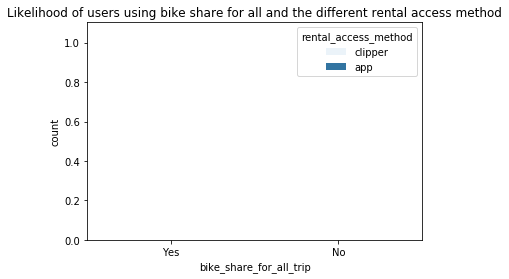

In [356]:
# Let's check out bike_share_for_all_trip and rental_access_method.
base_color = sb.color_palette()[0]
sb.countplot(data=bike_data_copy,x='bike_share_for_all_trip',hue='rental_access_method',color=base_color)
plt.title('Likelihood of users using bike share for all and the different rental access method')
bike_data_copy[bike_data_copy['bike_share_for_all_trip'].notna() & bike_data_copy['rental_access_method'].notna()]

There are no rows in the dataset where the two variables- rental_access-method and bike_share_for_all_trip are not None.

Text(0.5, 1.0, 'Likelihood of users using the different rental access method')

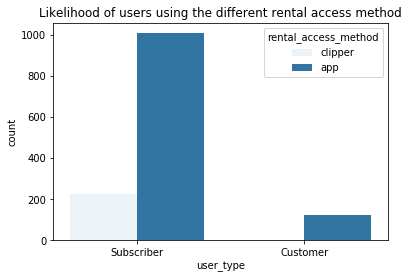

In [357]:
# Let's check out user_type and rental_access_method.
base_color = sb.color_palette()[0]
sb.countplot(data=bike_data_copy,x='user_type',hue='rental_access_method',color=base_color)
plt.title('Likelihood of users using the different rental access method')

The clipper users are in the subscriber group and there are none in the customer group.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As against my expectations, I found that some of the distances were very large. On closer inspection, I found that some of the latitudes and longitudes are marked as zero. So I removed such rows .
After the cleaning, I expected the duration to increase with distance. But it was not so. The distance increased to a limit and fell. Possibly, because the user was using it to reach a destination and came back to the original location later.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I was surprised that there was no clipper usage in any of the popular transit stations in San Francisco.

## Multivariate Exploration

(0, 16)
(13369, 16)
(127182, 16)


(39522, 16)

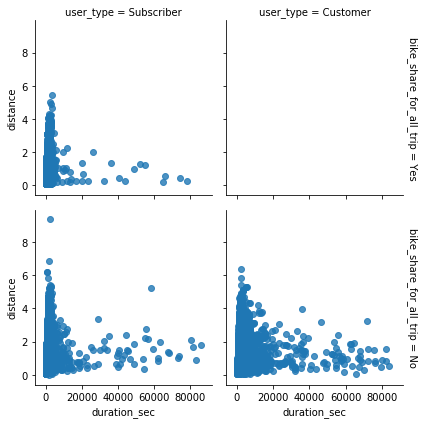

In [373]:
# Let's check out the distance-time relationship in the presence of the categorical variables- mainly user_type and 
# bike_share_for_all.I plan to use a faceted scatter plot
g=sb.FacetGrid(data=bike_data_copy,col='user_type',row='bike_share_for_all_trip',margin_titles=True)
g.map(sb.regplot,'duration_sec','distance',x_jitter=0.04,fit_reg=False)
#plt.xscale('log')
print(bike_data_copy[(bike_data_copy['user_type']=='Customer') & (bike_data_copy['bike_share_for_all_trip']=='Yes')].shape)
print(bike_data_copy[(bike_data_copy['user_type']=='Subscriber') & (bike_data_copy['bike_share_for_all_trip']=='Yes')].shape)
print(bike_data_copy[(bike_data_copy['user_type']=='Subscriber') & (bike_data_copy['bike_share_for_all_trip']=='No')].shape)
bike_data_copy[(bike_data_copy['user_type']=='Customer') & (bike_data_copy['bike_share_for_all_trip']=='No')].shape

The least amount of people are those who are customers and who use the bike share for all. Next comes those who are subscribers and who use bike share for all. The majority of the people do not use bike share for all. Of those people, more people are subscribers and then comes customers.

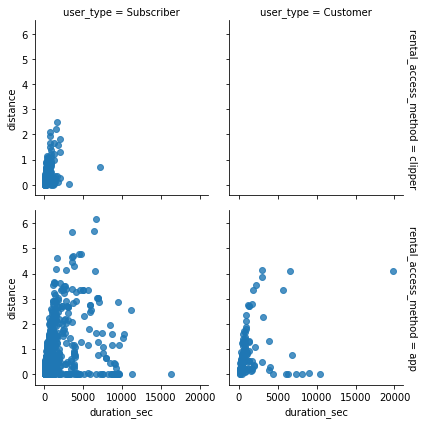

In [375]:
# Let's check out the distance time relationship in the presence of user_type and rental_access_method.
g=sb.FacetGrid(data=bike_data_copy,col='user_type',row='rental_access_method',margin_titles=True)
g.map(sb.regplot,'duration_sec','distance',x_jitter=0.04,fit_reg=False)
#plt.xscale('log')

As you can see, the subscribers who use clipper have less distance travelled and less time spent. They are probably just using for going to the transit stations.On closer inspection, I saw that many of the values when the rental access method are nans.

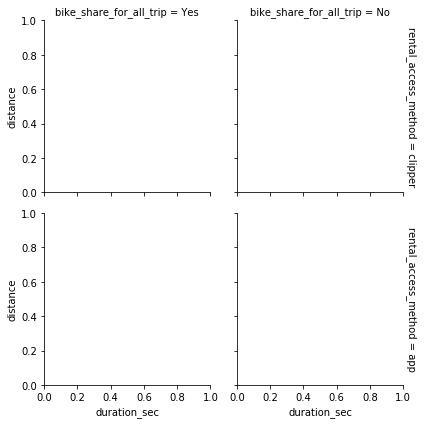

In [379]:
# Let's check out the distance time relationship in the presence of bike_share_for_all_trip and rental_access_method.
g=sb.FacetGrid(data=bike_data_copy,col='bike_share_for_all_trip',row='rental_access_method',margin_titles=True)
g.map(sb.regplot,'duration_sec','distance',x_jitter=0.04,fit_reg=False)
# There are no common values here to show.

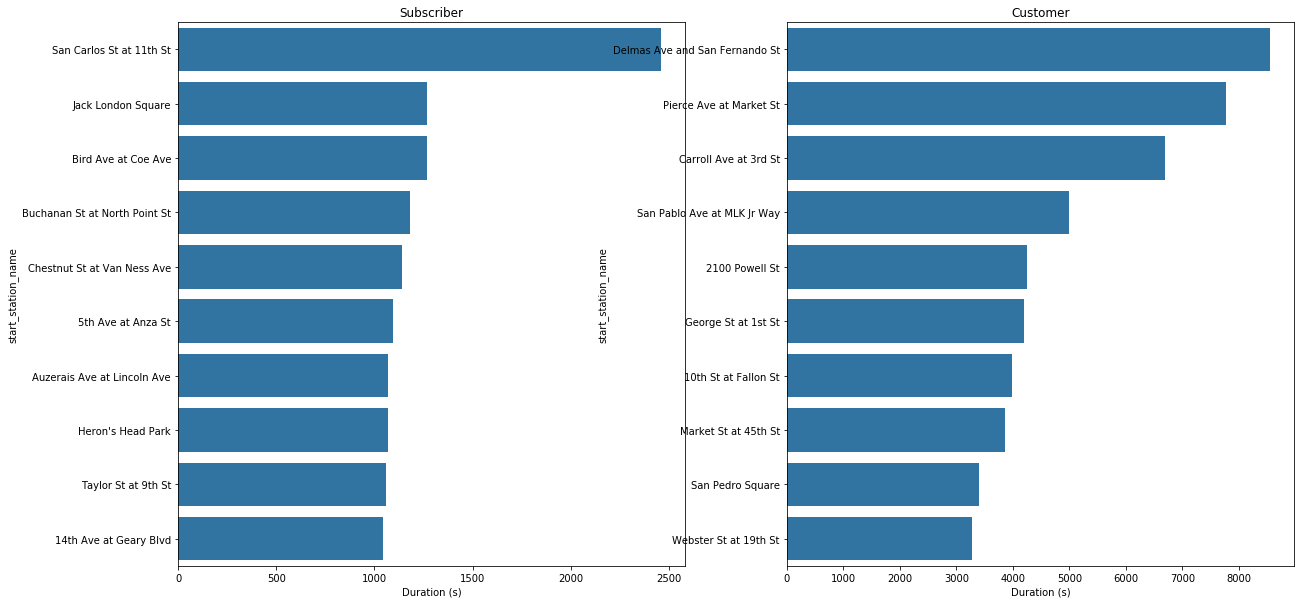

In [415]:
# Let's check out a dataset with distance < 1 mi. Let's plot the popular start stations vs time with a facet based on the
# user_type
data_sub = bike_data_copy[bike_data_copy['distance']< 1]
order = ['Subscriber','Customer']
plt.subplots(1,2,figsize=(20,10))
for i,member in enumerate(order):
    plt.subplot(1,2,i+1)
    sub = data_sub[data_sub['user_type']==member]
    grouped_data = sub.groupby('start_station_name')['duration_sec'].mean().sort_values(ascending=False)
    #print(grouped_data)
    xval = grouped_data.index[:10]
    sb.barplot(grouped_data.values[:10],grouped_data.index[:10],color=base_color)
    plt.title(member)
    plt.xlabel('Duration (s)')

Totally different stations

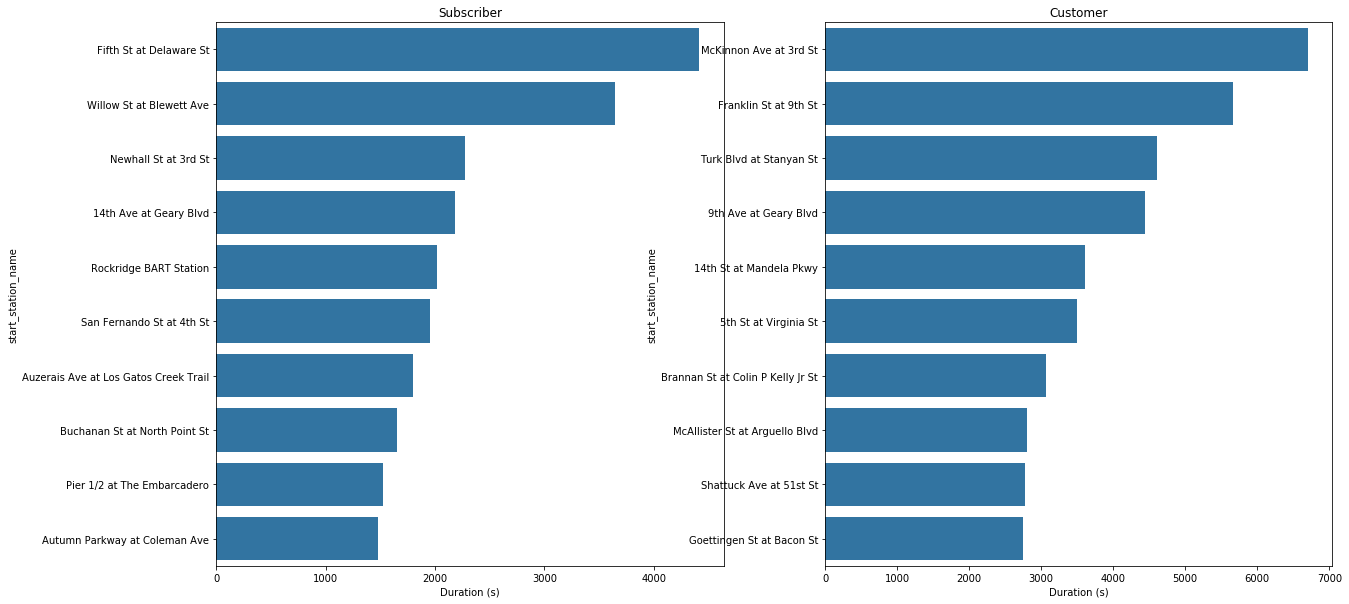

In [408]:
# Let's do it for distances >= 1 and < 2
data_sub = bike_data_copy[(bike_data_copy['distance']>= 1) & (bike_data_copy['distance']<2)]
order = ['Subscriber','Customer']
plt.subplots(1,2,figsize=(20,10))
for i,member in enumerate(order):
    plt.subplot(1,2,i+1)
    sub = data_sub[data_sub['user_type']==member]
    grouped_data = sub.groupby('start_station_name')['duration_sec'].mean().sort_values(ascending=False)
    xval = grouped_data.index[:10]
    sb.barplot(grouped_data.values[:10],grouped_data.index[:10],color=base_color)
    plt.title(member)
    plt.xlabel('Duration (s)')

Here also, the stations are totally different and only one transit station for subscribers.

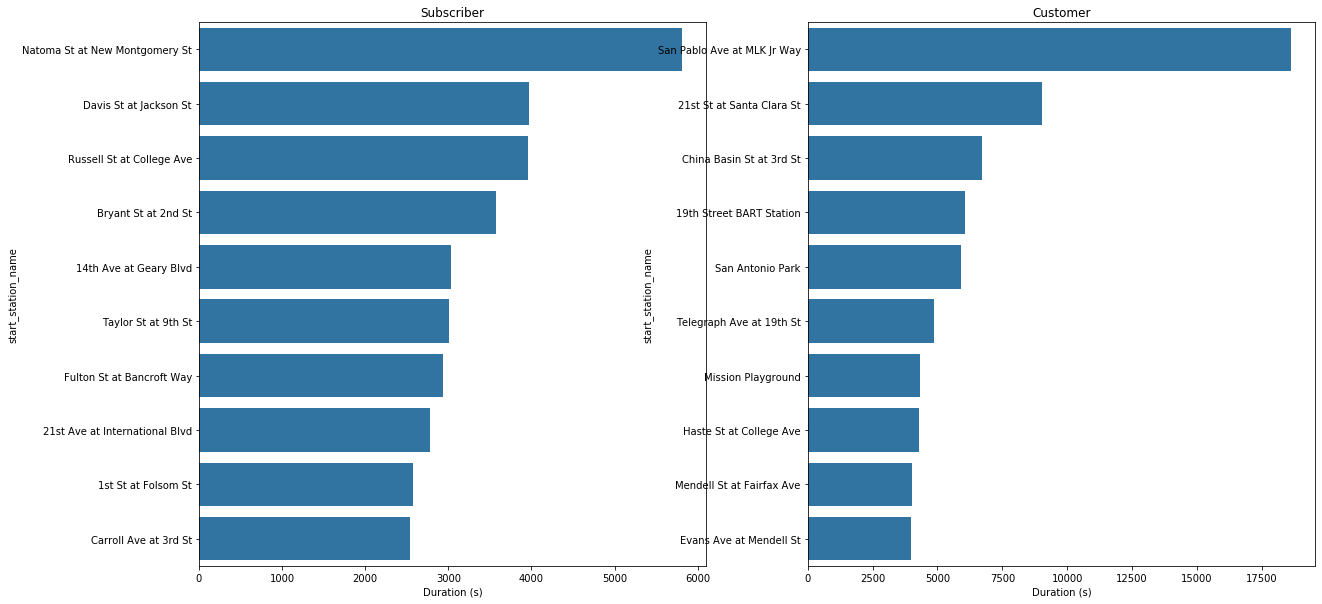

In [409]:
# Finally, let's do it for distances above 2 mi.
data_sub = bike_data_copy[bike_data_copy['distance']>=2]
order = ['Subscriber','Customer']
plt.subplots(1,2,figsize=(20,10))
for i,member in enumerate(order):
    plt.subplot(1,2,i+1)
    sub = data_sub[data_sub['user_type']==member]
    grouped_data = sub.groupby('start_station_name')['duration_sec'].mean().sort_values(ascending=False)
    xval = grouped_data.index[:10]
    sb.barplot(grouped_data.values[:10],grouped_data.index[:10],color=base_color)
    plt.title(member)
    plt.xlabel('Duration (s)')

Here too, there are not anything common between the stations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The difference between customers and subscribers have been made more stark by this analysis. For the univariate analysis,we figured that the number of  subscribers were much more than customers. The median distance travelled and the duration of trips for customers were slightly more than that of subscribers and also the range of values for distances is more for customers.
In the multivariate analysis, it looks like even the starting stations based on the amount of time spent are also different.

### Were there any interesting or surprising interactions between features?

The range of distance travelled by a subscriber who is also a clipper user is much less compared to subsets of other users.